# Proyecto Final

Proyecto asignado en el curso **Introducción a la Ciencia de Datos con Python**.

## Requerimientos minimos

Para comprender este proyecto, se te solicitará que observes la base de datos y realices lo siguiente:

- Traduce las columnas y proporciona una idea de su posible contenido. ¿Qué representa *culmen*?
- Posteriormente, realiza un análisis exploratorio del dataframe, centrándote en los tipos de valores que almacenan sus columnas, la cantidad de valores NaN y en qué columnas se encuentran.

El siguiente paso es preparar la base de datos. Para ello, primero debes eliminar las columnas que contienen valores no numéricos. Posteriormente, rellena con la media de la columna los valores nulos o `NaN`.

Después, imprime en pantalla la matriz de correlación y posteriormente el *heatmap*. Analiza cuáles son las dos variables que presentan una correlación más alta. Recuerda importar las bibliotecas `matplotlib` y `seaborn`.

Una vez conocidas las correlaciones, te interesa visualizar la forma que tienen; por lo tanto, es necesario realizar una matriz de gráficos de dispersión.

Ahora, realiza una regresión lineal de las dos variables que consideren más significativas. Expón su coeficiente de determinación (R²) y determina si es suficientemente explicativo. En este apartado, puedes graficar la dispersión de estas dos variables junto con la línea de regresión predicha. Puedes imprimir los datos que consideres necesarios.

Luego, implementa el algoritmo de k-means para las dos variables elegidas. Como recomendación, no utilices las mismas dos variables que usaste para la regresión y plotea estos gráficos con la coloración que prefieras. 

Finalmente, realiza una regresión logística que explique el sexo del pingüino a partir del resto de variables que no son cadenas.

# Inicio del proyecto

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# dataframe
df = pd.read_csv('/content/penguins_size.csv')

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 1. Observaciones de la base de datos.

### Traducción de las columnas.

De acuerdo a la investigación que hice, *culmen* es el término que se le da a la parte superior de la cresta del pico de un pájaro ([fuente](https://www.google.com/search?q=traductor&sourceid=chrome&ie=UTF-8)), mientras que *flipper* traducido al español es *aleta*.

Por lo tanto, la traducción y la información que contiene cada columna relacionada a los pinguinos serían las siguientes:
* `species`: su especie.
* `island`: la isla de donde es oriundo.
* `culmen_length_mm`: la longitud de su pico en milímetros.
* `culmen_depth_mm`: la profundidad de su pico en milímetros (o bien, a como yo lo entiendo mejor, la longitud vertical de su pico).
* `flipper_length_mm`: la longitud de sus aletas en milímetros.
* `body_mass_g`: la masa de su cuerpo en gramos.
* `sex`: su sexo.

### Análisis exploratorio del dataframe.



In [ ]:
# tipos de valores
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
# los NaN's del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 2. Preparación de la base de datos.

### Eliminación de las columnas no numéricas.

In [ ]:
df_copy = df
df_copy = df_copy.drop(['species', 'island', 'sex'], axis=1);
df_copy.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [ ]:
# Rellenando los NaN's
mean_culmenl = df_copy['culmen_length_mm'].mean()
mean_culmend = df_copy['culmen_depth_mm'].mean()
mean_flipper = df_copy['flipper_length_mm'].mean()
mean_body = df_copy['body_mass_g'].mean()

df_copy['culmen_length_mm']  = df_copy['culmen_length_mm'].fillna(mean_culmenl)
df_copy['culmen_depth_mm']   = df_copy['culmen_depth_mm'].fillna(mean_culmend)
df_copy['flipper_length_mm'] = df_copy['flipper_length_mm'].fillna(mean_flipper)
df_copy['body_mass_g']       = df_copy['body_mass_g'].fillna(mean_body)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   344 non-null    float64
 1   culmen_depth_mm    344 non-null    float64
 2   flipper_length_mm  344 non-null    float64
 3   body_mass_g        344 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB


## 3. Impresión en pantalla de gráficas.

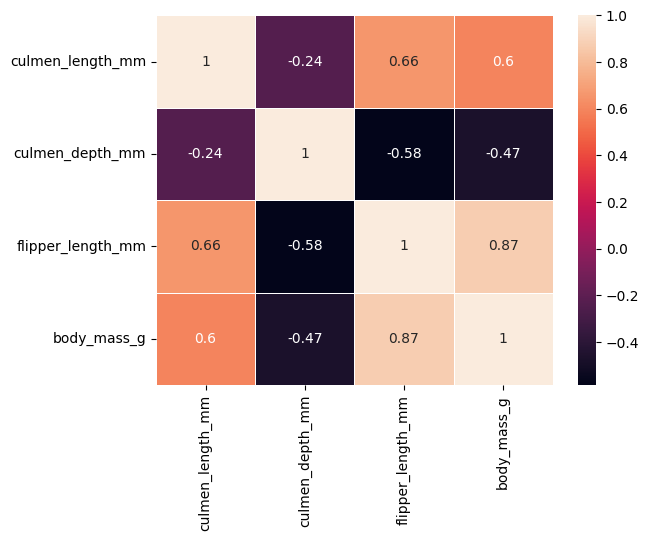

In [ ]:
sns.heatmap(df_copy.corr(), annot=True, linewidths=.5);

Podemos observar que las dos variables más relacionadas son las longitud de las aletas y la masa del cuerpo. En el mapa de calor tienen el valor más alto (0.87) por una alta diferencia.

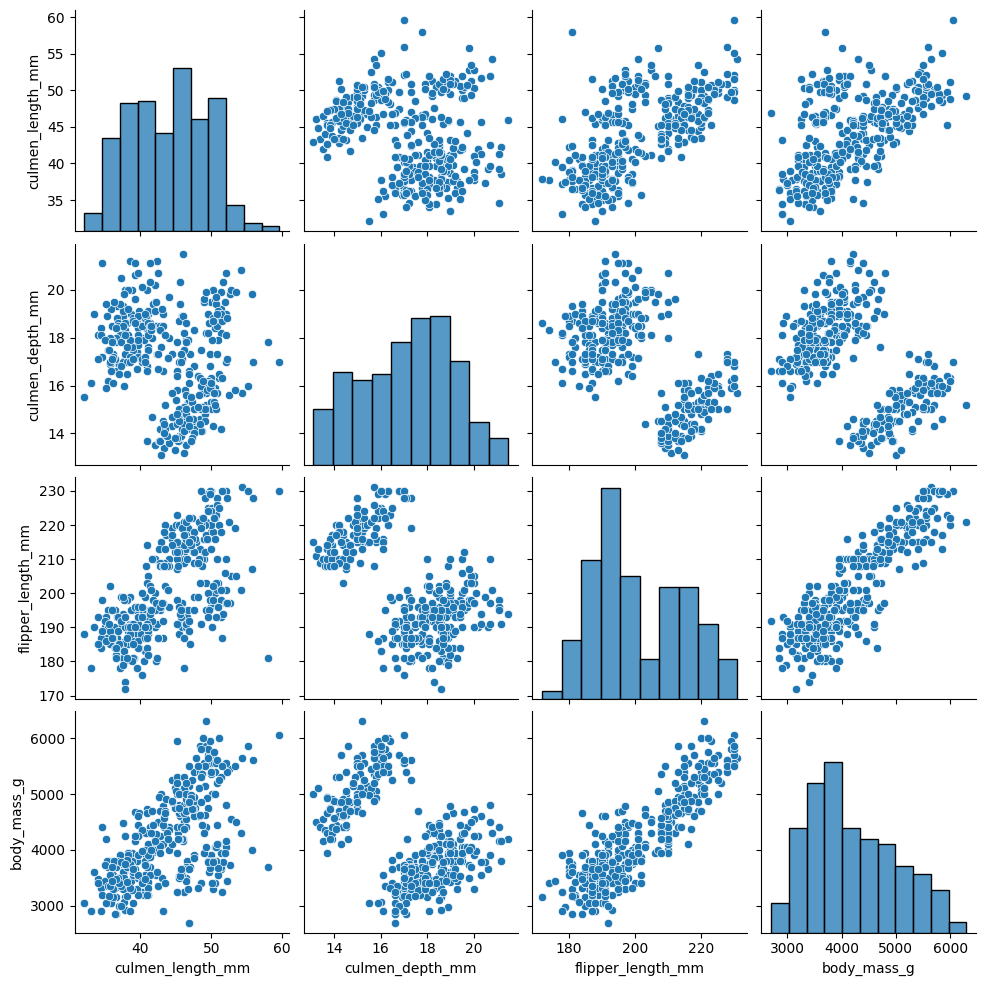

In [ ]:
# pairplot
sns.pairplot(df_copy)

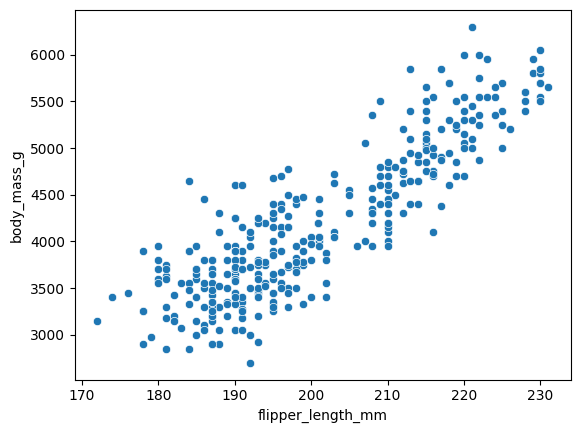

In [ ]:
serie_1 = pd.Series(df_copy['flipper_length_mm'])
serie_2 = pd.Series(df_copy['body_mass_g'])

sns.scatterplot(x = serie_1, y = serie_2);

In [ ]:
serie_1.corr(serie_2)

0.8712017673060108

Así, confirmamos que el coeficiente de correlación es muy alto.

## 4. Regresión lineal

Tomemos como `x` a `flipper_length_mm`.

In [ ]:
lr = LinearRegression()

lr.fit(serie_1.to_frame(), serie_2)

LinearRegression()

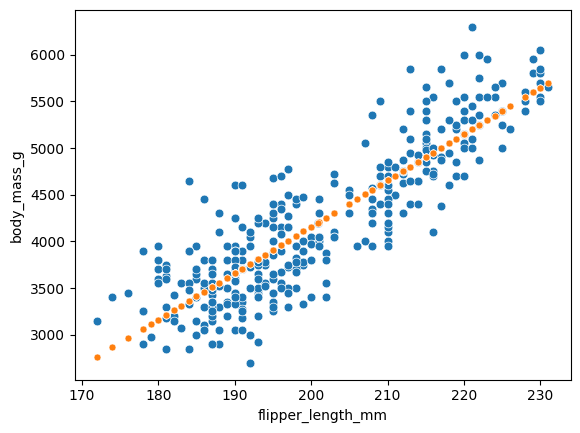

In [ ]:
body_mass_predict = lr.predict(serie_1.to_frame())

sns.scatterplot(x = serie_1, y = serie_2, s=40);
sns.scatterplot(x = serie_1, y = body_mass_predict, s=25);

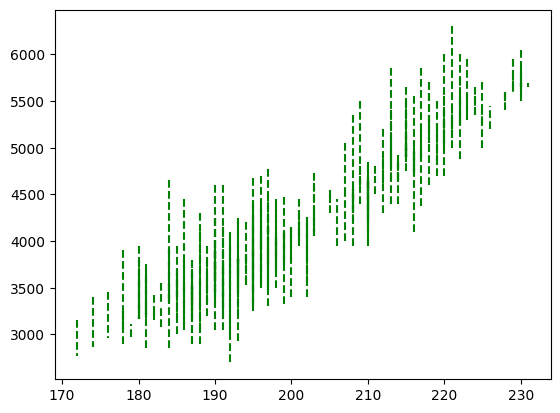

In [ ]:
# Margen de error
for i in range(len(serie_1)):
    plt.plot([serie_1[i], serie_1[i]], [serie_2[i], body_mass_predict[i]], 'g--')

In [ ]:
# Veamos cuál es la ecuación
intercept = lr.intercept_
coefficient = lr.coef_[0]

print(f'y = {coefficient} * x + {intercept}')

y = 49.68556640610011 * x + -5780.831358077066


In [ ]:
# Ahora, el coeficiente de determinación
print(f'R2: {np.power(serie_1.corr(serie_2), 2)}')

R2: 0.7589925193571166


In [ ]:
# El de nuestro modelo entrenado
print(f'R2: {lr.score(serie_1.to_frame(), serie_2)}')

R2: 0.7589925193571176


Como podemos observar, el valor está más cerca del 1 que del 0 con diferencia, lo cual nos dice que en 3 de 4 casos la longitud de las aletas va de la mano con la masa del pingüino (o viceversa).

## 5. K-Medias

Para este caso, ocuparemos otro par de varibles, más concretamente, el segundo par con mayor correlación con 0.66: `culmen_length_mm` y `flipper_length_mm`.

In [ ]:
flipper_serie = pd.Series(df_copy['flipper_length_mm'])
culmenl_serie = pd.Series(df_copy['culmen_length_mm'])

flipper_serie.corr(culmenl_serie)

0.6561813407464278

In [ ]:
k_means = KMeans(n_clusters=3, max_iter=10000)
k_means.fit(df_copy[['culmen_length_mm', 'flipper_length_mm']])

centers = k_means.cluster_centers_

centers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 45.90358187, 196.92531676],
       [ 47.58671875, 216.9609375 ],
       [ 38.4275    , 186.99166667]])

<ipython-input-100-52536b991735>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df_copy['culmen_length_mm'], y = df_copy['flipper_length_mm'], ax=ax,  palette='rainbow');


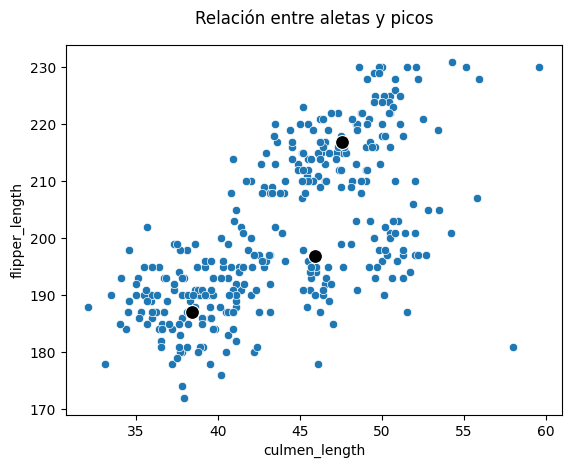

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Relación entre aletas y picos', pad=15)
ax.set_xlabel('culmen_length')
ax.set_ylabel('flipper_length')

sns.scatterplot(x = df_copy['culmen_length_mm'], y = df_copy['flipper_length_mm'], ax=ax,  palette='rainbow');
sns.scatterplot(x = centers[:,0], y = centers[:,1], ax=ax, s=100, color='black');

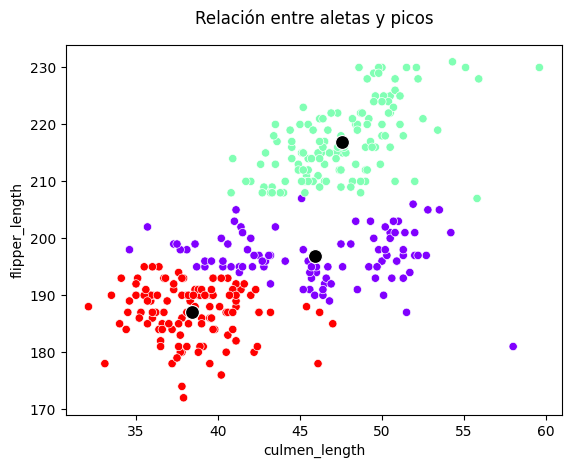

In [ ]:
# Clasificación de los datos
clasificaciones = k_means.predict(df_copy[['culmen_length_mm', 'flipper_length_mm']])

fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Relación entre aletas y picos', pad=15)
ax.set_xlabel('culmen_length')
ax.set_ylabel('flipper_length')

sns.scatterplot(x = df['culmen_length_mm'], y = df['flipper_length_mm'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(x = centers[:,0], y = centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

Con este análisis, podemos observar que la relación existente entre la longitud del pico y de la aleta converge de esta manera: de manera normal, a mayor longitud del pico, la de la aleta tiende a tener cierto margen de longitud.

## 6. Regresión logística

Volvemos a utilizar el dataset original y desde ahí trabajaremos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df_copy2 = df
df_copy2 = df_copy2.drop(['species', 'island'], axis=1);
df_copy.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [ ]:
# Volvemos a llenar los NaN's
df_copy2['culmen_length_mm']  = df_copy2['culmen_length_mm'].fillna(mean_culmenl)
df_copy2['culmen_depth_mm']   = df_copy2['culmen_depth_mm'].fillna(mean_culmend)
df_copy2['flipper_length_mm'] = df_copy2['flipper_length_mm'].fillna(mean_flipper)
df_copy2['body_mass_g']       = df_copy2['body_mass_g'].fillna(mean_body)

# Eliminamos las filas donde el sexo sea NaN
df_copy2 = df_copy2.dropna(axis=0, how='any')
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   334 non-null    float64
 1   culmen_depth_mm    334 non-null    float64
 2   flipper_length_mm  334 non-null    float64
 3   body_mass_g        334 non-null    float64
 4   sex                334 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [ ]:
df_copy2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
# Cambiamos MALE y FEMALE por 0 y 1 respectivamente
df_copy2['sex'] = df_copy2['sex'].apply(lambda x: 1 if x == 'FEMALE' else 0)
df_copy2

<ipython-input-110-ded2e04224e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy2['sex'] = df_copy2['sex'].apply(lambda x: 1 if x == 'FEMALE' else 0)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,1


In [ ]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   334 non-null    float64
 1   culmen_depth_mm    334 non-null    float64
 2   flipper_length_mm  334 non-null    float64
 3   body_mass_g        334 non-null    float64
 4   sex                334 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.7 KB


Con lo visto arriba, podemos confirmar que ahora la columna `sex` es de tipo `int64`.

Ahora sí, vamos con la regresión logística

In [ ]:
X = df_copy2.drop(columns=['sex'])
y = df_copy2['sex']

In [ ]:
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Ahora, podemos hacer las predicciones

y_pred = logreg.predict(X_test)

y_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
logreg.score(X_test, y_test)

0.9306930693069307

Podemos observar que el valor de exactitud promedio es alto, lo cual implica que las medidas y el peso de un pingüino van de la mano con su sexo en la gran mayoría de los casos.